In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
import seaborn as sns

#### **Loading dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### **Splitting the dataset into train and test split**

In [3]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


#### **Normalizing the data**

In [4]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = test_images.astype('float32') / 255

In [5]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [6]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(test_labels, 10)

- MNIST Dataset: The MNIST dataset consists of 70,000 28x28 grayscale images of handwritten digits (0-9).
- train_images: Contains 60,000 training images of digits (28x28 pixels).
- test_images: Contains 10,000 test images of digits.
- train_images and train_labels are split into X_train and y_train (training set) and X_val and y_val (validation set).
- test_size=0.1: This means 10% of the original training data will be used for validation, leaving 90% for training.
- random_state=42: This ensures the split is reproducible, meaning you'll get the same split every time you run the code.
- The pixel values of images range from 0 to 255. To help the model learn efficiently, these values are scaled to the range [0, 1].
- Adding a new axis to the data, making the shape (28, 28, 1) for grayscale images (1 channel) to support CNN.
- Labels are converted into a one-hot encoded format for multi-class classification.

# **Model Creation without optimizer**

#### **Model Training**

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model.compile(
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.8858 - loss: 0.3758 - val_accuracy: 0.9792 - val_loss: 0.0733
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.9813 - loss: 0.0650 - val_accuracy: 0.9847 - val_loss: 0.0556
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.9853 - val_loss: 0.0481
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.9860 - val_loss: 0.0459
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9883 - val_loss: 0.0452


In [101]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,387,926 (5.29 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 693,964 (2.65 MB)

#### Model summary
- Conv2D Layer: 32 filters of size (3, 3) with ReLU activation, input shape (28, 28, 1) for grayscale images.
- MaxPooling2D Layer: Pooling size (2, 2) to reduce spatial dimensions and computational load.
- Flatten Layer: Flattens the 2D feature map into a 1D vector.
- Dense Hidden Layer: 128 neurons with ReLU activation to learn complex patterns.
- Dense Output Layer: 10 neurons with softmax activation for multi-class classification.
- Model Compilation: Categorical Cross-Entropy loss and Accuracy metric for performance measurement.
- Model Training: Trained for 5 epochs with a batch size of 64, using validation data to prevent overfitting.

#### **Model Prediction**

In [11]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [13]:
predicted_labels = np.argmax(predictions, axis=1)

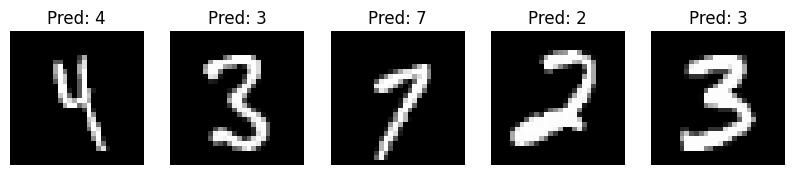

In [14]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

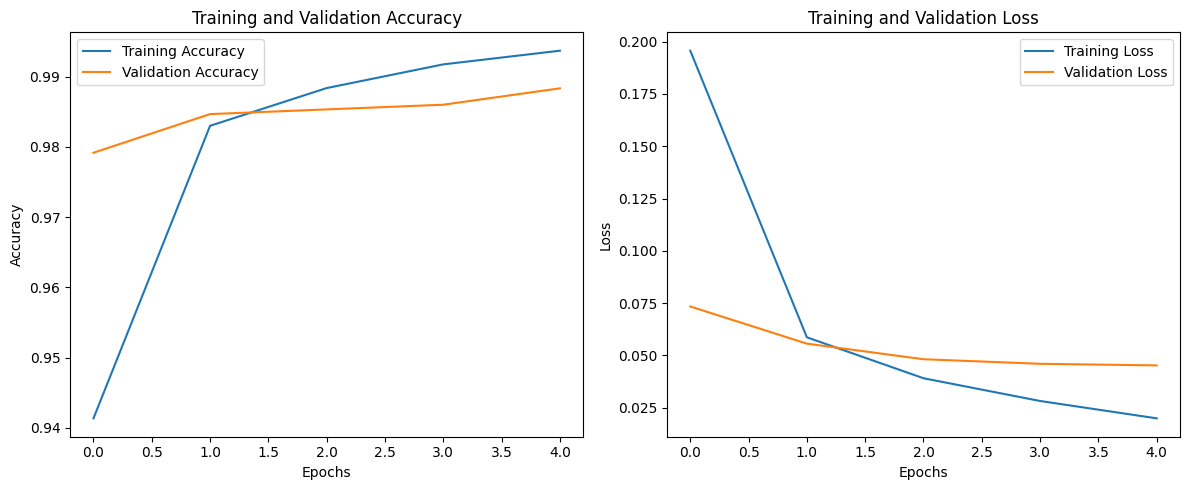

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### **Model Evaluation**

In [19]:
accuracy_gnb = accuracy_score(test_labels, predicted_labels)
precision_gnb = precision_score(test_labels, predicted_labels, average='weighted')
recall_gnb = recall_score(test_labels, predicted_labels, average='weighted')
f1_gnb = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy_gnb:.4f}",
    f"{precision_gnb:.4f}",
    f"{recall_gnb:.4f}",
    f"{f1_gnb:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|     0.9868 |      0.9869 |   0.9868 |     0.9868 |
+------------+-------------+----------+------------+


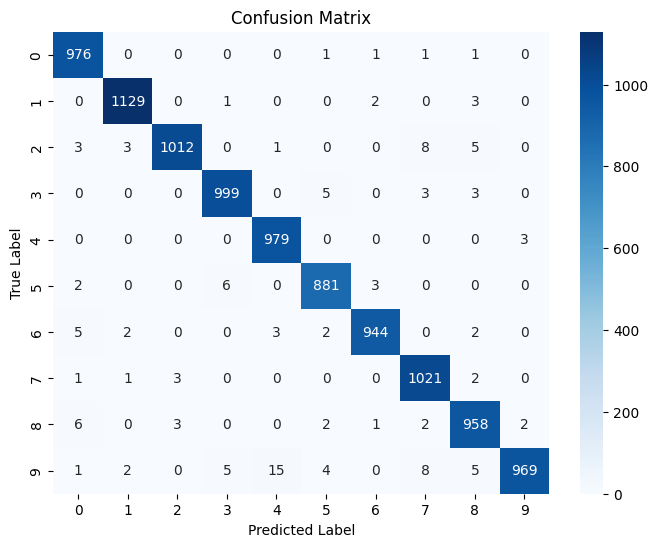

In [23]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Model Creation with optimizer**

#### **Model Creation**

In [25]:
model_with_adam = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model_with_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_with_adam = model_with_adam.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.8962 - loss: 0.3759 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.9800 - loss: 0.0656 - val_accuracy: 0.9768 - val_loss: 0.0757
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.9872 - loss: 0.0399 - val_accuracy: 0.9860 - val_loss: 0.0498
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9922 - loss: 0.0258 - val_accuracy: 0.9848 - val_loss: 0.0524
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.9947 - loss: 0.0184 - val_accuracy: 0.9880 - val_loss: 0.0454


In [102]:
model_with_adam.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

#### Model summary
- Conv2D Layer: 32 filters of size (3, 3) with ReLU activation, input shape (28, 28, 1) for grayscale images.
- MaxPooling2D Layer: Pooling size (2, 2) to reduce spatial dimensions and computational load.
- Flatten Layer: Flattens the 2D feature map into a 1D vector.
- Dense Hidden Layer: 128 neurons with ReLU activation to learn complex patterns.
- Dense Output Layer: 10 neurons with softmax activation for multi-class classification.
- Model Compilation: Categorical Cross-Entropy loss and Accuracy metric for performance measurement. Adam optimizer for improved performance
- Model Training: Trained for 5 epochs with a batch size of 64, using validation data to prevent overfitting.

#### **Model Prediction**

In [30]:
predictions_with_adam = model_with_adam.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [31]:
predicted_labels = np.argmax(predictions_with_adam, axis=1)

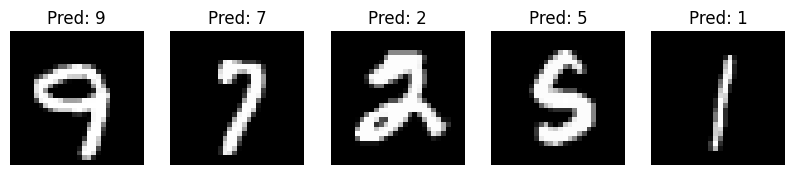

In [32]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

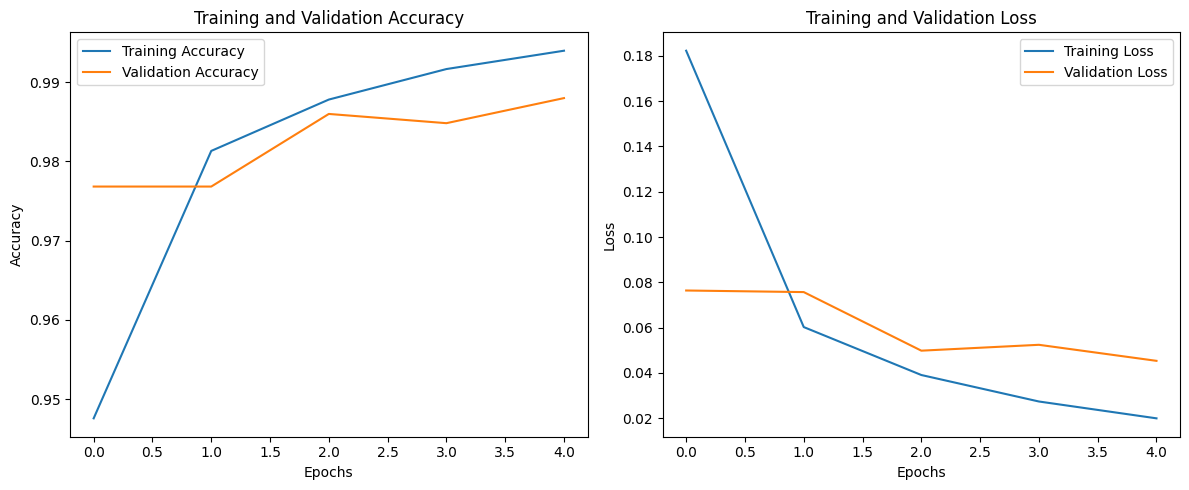

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history_with_adam.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_adam.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_with_adam.history['loss'], label='Training Loss')
axes[1].plot(history_with_adam.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [34]:
accuracy_gnb = accuracy_score(test_labels, predicted_labels)
precision_gnb = precision_score(test_labels, predicted_labels, average='weighted')
recall_gnb = recall_score(test_labels, predicted_labels, average='weighted')
f1_gnb = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy_gnb:.4f}",
    f"{precision_gnb:.4f}",
    f"{recall_gnb:.4f}",
    f"{f1_gnb:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|     0.9862 |      0.9862 |   0.9862 |     0.9862 |
+------------+-------------+----------+------------+


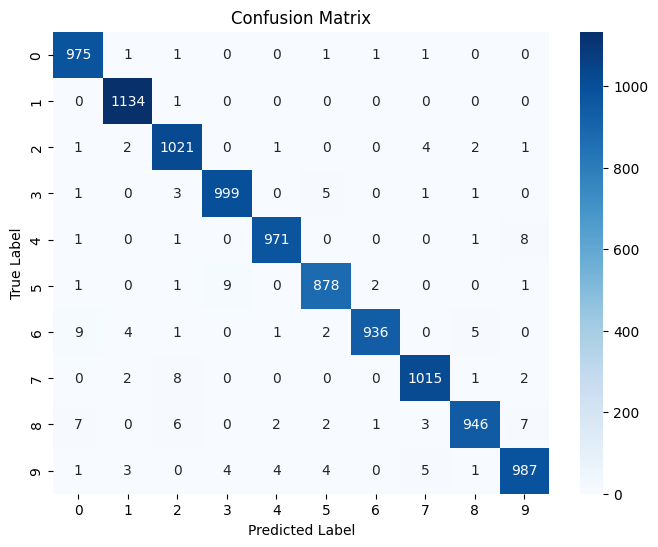

In [35]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Experimentation with increasing layers**

In [38]:
model_3layer_adam = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
     Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),  # 1 output classes (for MNIST digits 0-9)
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model_3layer_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_with_3layer_adam = model_3layer_adam.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.8220 - loss: 0.5578 - val_accuracy: 0.9608 - val_loss: 0.1286
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 75ms/step - accuracy: 0.9691 - loss: 0.0987 - val_accuracy: 0.9728 - val_loss: 0.0828
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.9807 - loss: 0.0611 - val_accuracy: 0.9828 - val_loss: 0.0562
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - accuracy: 0.9865 - loss: 0.0436 - val_accuracy: 0.9792 - val_loss: 0.0612
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 64ms/step - accuracy: 0.9889 - loss: 0.0352 - val_accuracy: 0.9852 - val_loss: 0.0489


In [104]:
model_3layer_adam.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,272 (1.35 MB)

 Trainable params: 118,090 (461.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,182 (922.59 KB)

#### Model summary
- MaxPooling2D Layer 1: (2,2) pooling reduces spatial dimensions, improving efficiency.
- Conv2D Layer 2: 64 filters of size (3,3) with ReLU activation, extracting deeper features.
- MaxPooling2D Layer 2: (2,2) pooling further reduces feature map size.
- Conv2D Layer 3: 128 filters of size (3,3) with ReLU activation for deeper feature extraction.
- MaxPooling2D Layer 3: (2,2) pooling to minimize spatial dimensions.
- Flatten Layer: Converts 2D feature maps into a 1D vector for dense layers.
- Dense Layer 1: 128 neurons with ReLU activation to learn high-level representations.
- Dense Layer 2: 64 neurons with ReLU activation for additional feature learning.
- Dense Output Layer: 10 neurons with softmax activation for multi-class classification.
- Model Compilation: Uses Adam optimizer and categorical cross-entropy loss for training.
- Model Training: Runs for 5 epochs with batch size 64, validating on a separate dataset.

In [39]:
predictions_with_3layer_adam = model_3layer_adam.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [40]:
predicted_labels = np.argmax(predictions_with_3layer_adam, axis=1)

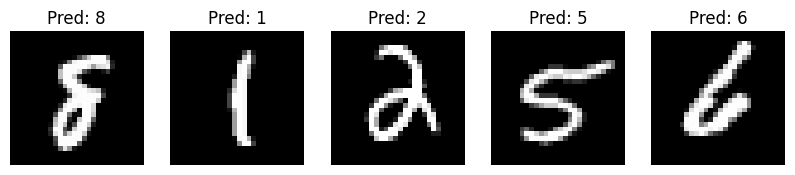

In [41]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

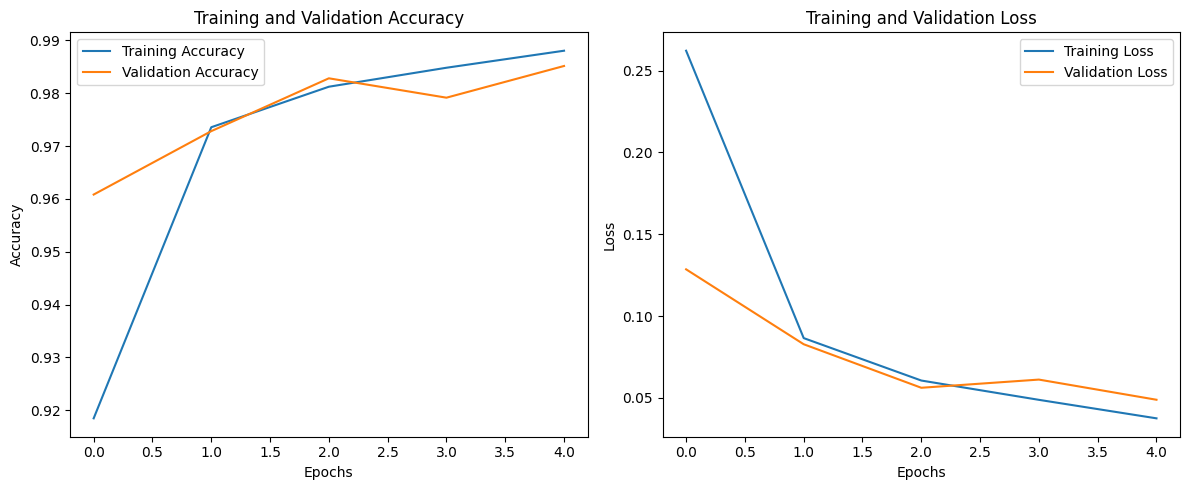

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history_with_3layer_adam.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_3layer_adam.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_with_3layer_adam.history['loss'], label='Training Loss')
axes[1].plot(history_with_3layer_adam.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [43]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy:.4f}",
    f"{precision:.4f}",
    f"{recall:.4f}",
    f"{f1:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|      0.985 |      0.9851 |    0.985 |      0.985 |
+------------+-------------+----------+------------+


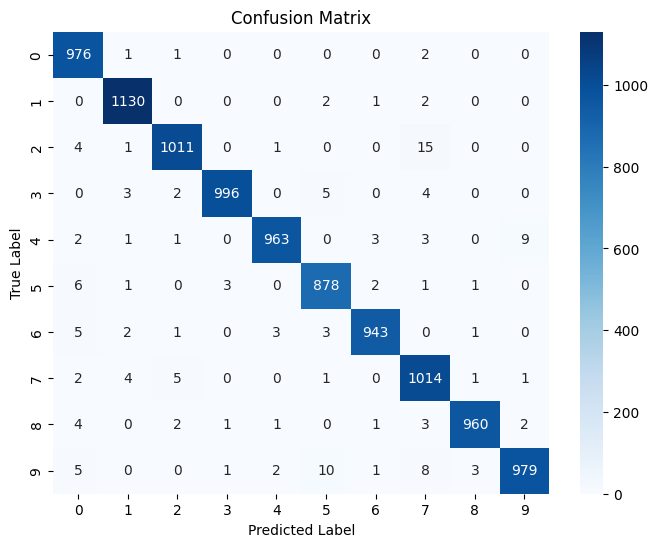

In [44]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.97      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.99     10000



# **Change Number of Filters with original Number of Layers**

In [54]:
model_128CNN_adam = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # 1 output classes (for MNIST digits 0-9)
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model_128CNN_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_with_128CNN_adam = model_128CNN_adam.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.9045 - loss: 0.3298 - val_accuracy: 0.9802 - val_loss: 0.0664
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - accuracy: 0.9839 - loss: 0.0539 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.9896 - loss: 0.0326 - val_accuracy: 0.9853 - val_loss: 0.0489
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 76ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.9842 - val_loss: 0.0518
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9875 - val_loss: 0.0421


In [105]:
model_128CNN_adam.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,159,520 (15.87 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,773,014 (10.58 MB)

#### Model Summary
- Conv2D Layer: 64 filters of size (3,3) with ReLU activation, processing 28x28 grayscale images.
- MaxPooling2D Layer: (2,2) pooling reduces spatial dimensions for efficient computation.
- Flatten Layer: Converts 2D feature maps into a 1D vector for dense layers.
- Dense Layer: 128 neurons with ReLU activation for learning high-level features.
- Output Layer: 10 neurons with softmax activation for multi-class classification.
- Model Compilation: Uses Adam optimizer and categorical cross-entropy loss for training.
- Model Training: Runs for 5 epochs with batch size 64, validating on a separate dataset.

In [55]:
predictions_with_128CNN_adam = model_128CNN_adam.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [56]:
predicted_labels = np.argmax(predictions_with_128CNN_adam, axis=1)

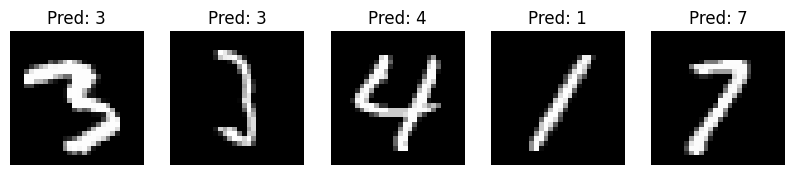

In [57]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

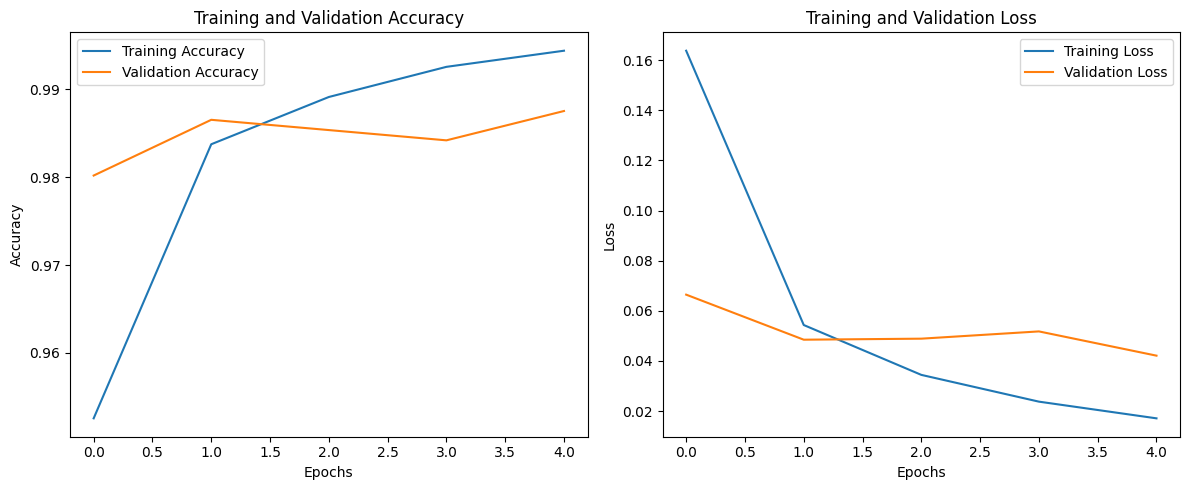

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history_with_128CNN_adam.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_128CNN_adam.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_with_128CNN_adam.history['loss'], label='Training Loss')
axes[1].plot(history_with_128CNN_adam.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [59]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy:.4f}",
    f"{precision:.4f}",
    f"{recall:.4f}",
    f"{f1:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|      0.986 |      0.9861 |    0.986 |      0.986 |
+------------+-------------+----------+------------+


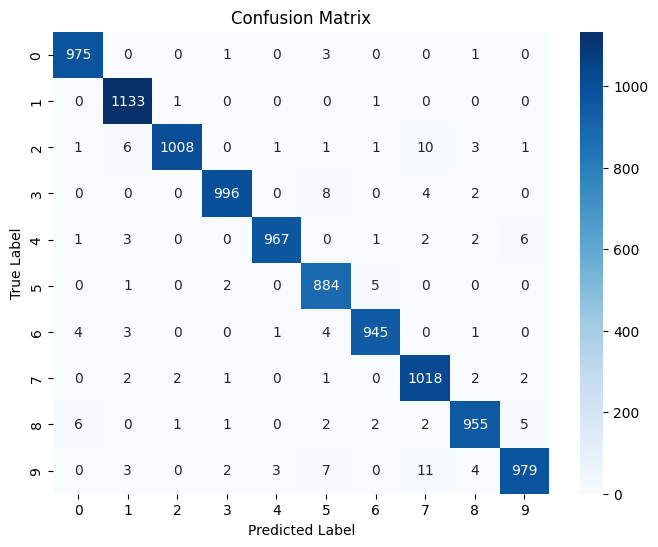

In [60]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Change Filter Size**

In [62]:
model_5by5filter_adam = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # 1 output classes (for MNIST digits 0-9)
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model_5by5filter_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_with_5by5filter_adam = model_5by5filter_adam.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.8965 - loss: 0.3528 - val_accuracy: 0.9818 - val_loss: 0.0636
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9831 - loss: 0.0570 - val_accuracy: 0.9845 - val_loss: 0.0527
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9890 - loss: 0.0360 - val_accuracy: 0.9872 - val_loss: 0.0477
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9843 - val_loss: 0.0551
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9863 - val_loss: 0.0449


In [106]:
model_5by5filter_adam.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,495,904 (5.71 MB)

 Trainable params: 498,634 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 997,270 (3.80 MB)

#### Model Summary
- Conv2D Layer: 32 filters of size (5,5) with ReLU activation, extracting spatial features from 28x28 grayscale images.
- MaxPooling2D Layer: (2,2) pooling reduces feature map size, improving efficiency.
- Flatten Layer: Converts 2D feature maps into a 1D vector for dense layers.
- Dense Layer: 128 neurons with ReLU activation to capture high-level patterns.
- Output Layer: 10 neurons with softmax activation for digit classification (0-9).
- Model Compilation: Uses Adam optimizer and categorical cross-entropy loss for multi-class classification.
- Model Training: Runs for 5 epochs with batch size 64, validating on a separate dataset.

In [63]:
predictions_with_5by5_adam = model_5by5filter_adam.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
predicted_labels = np.argmax(predictions_with_5by5_adam, axis=1)

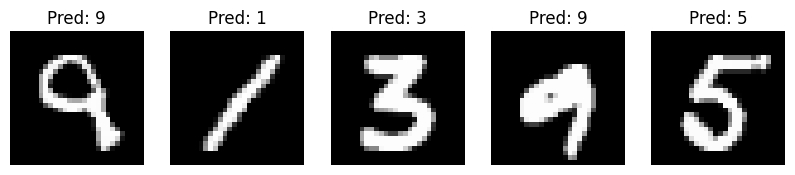

In [64]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

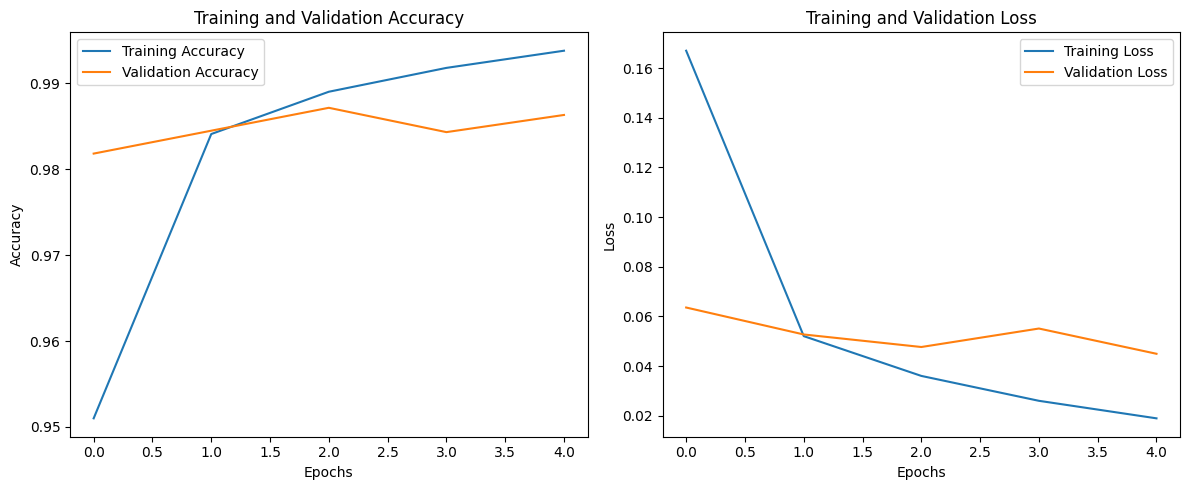

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history_with_5by5filter_adam.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_5by5filter_adam.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_with_5by5filter_adam.history['loss'], label='Training Loss')
axes[1].plot(history_with_5by5filter_adam.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [66]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy:.4f}",
    f"{precision:.4f}",
    f"{recall:.4f}",
    f"{f1:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|      0.986 |      0.9861 |    0.986 |      0.986 |
+------------+-------------+----------+------------+


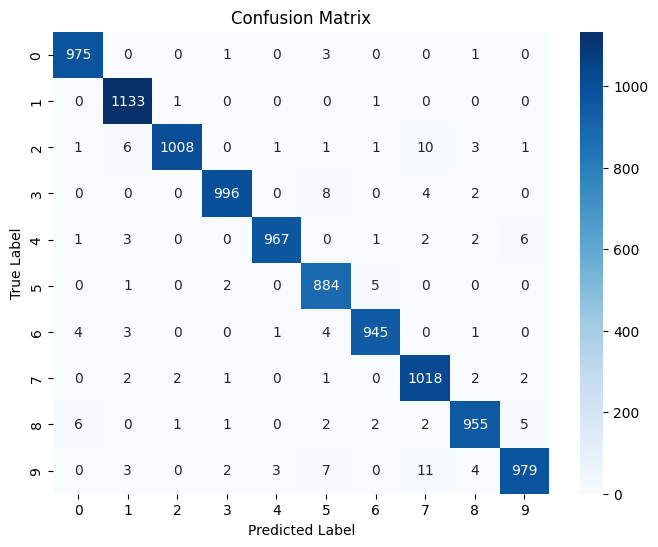

In [67]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Changing Filter size to 7 by 7**

In [78]:
model_7by7filter_adam = Sequential([
    Conv2D(32, (7, 7), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # 1 output classes (for MNIST digits 0-9)
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model_7by7filter_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_with_7by7filter_adam = model_7by7filter_adam.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9035 - loss: 0.3308 - val_accuracy: 0.9825 - val_loss: 0.0588
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9842 - val_loss: 0.0559
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9870 - val_loss: 0.0453
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9885 - val_loss: 0.0373
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9885 - val_loss: 0.0395


In [107]:
model_7by7filter_adam.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 22, 22, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,495,904 (5.71 MB)

 Trainable params: 498,634 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 997,270 (3.80 MB)

#### Model Summary
- Conv2D Layer: 32 filters of size (7,7) with ReLU activation to extract spatial features.
- MaxPooling2D Layer: (2,2) pooling reduces feature map size, improving efficiency.
- Flatten Layer: Converts 2D feature maps into a 1D vector for dense layers.
- Dense Layer: 128 neurons with ReLU activation to learn complex patterns.
- Output Layer: 10 neurons with softmax activation for digit classification (0-9).
- Model Compilation: Adam optimizer and categorical cross-entropy loss for multi-class classification.
- Model Training: Runs for 5 epochs with batch size 64, validating on a separate dataset

In [79]:
predictions_with_7by7_adam = model_7by7filter_adam.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [80]:
predicted_labels = np.argmax(predictions_with_7by7_adam, axis=1)

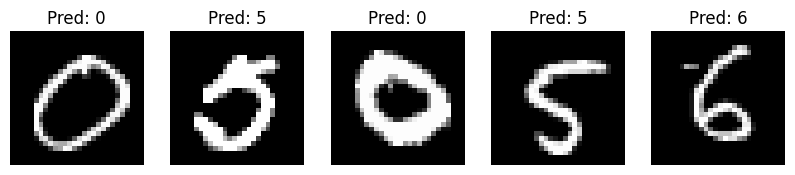

In [81]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

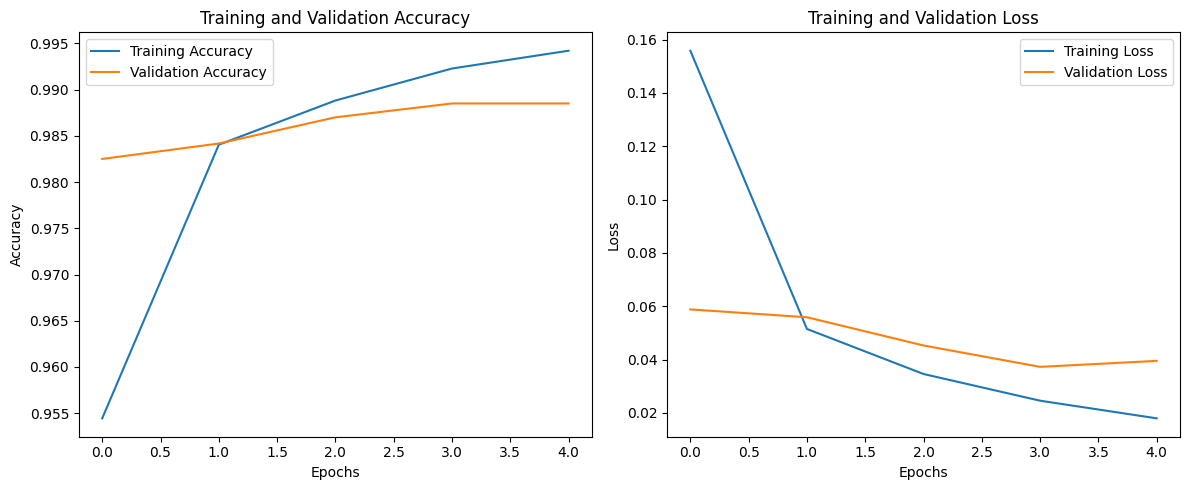

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history_with_7by7filter_adam.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_7by7filter_adam.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_with_7by7filter_adam.history['loss'], label='Training Loss')
axes[1].plot(history_with_7by7filter_adam.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [83]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy:.4f}",
    f"{precision:.4f}",
    f"{recall:.4f}",
    f"{f1:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|     0.9878 |      0.9878 |   0.9878 |     0.9878 |
+------------+-------------+----------+------------+


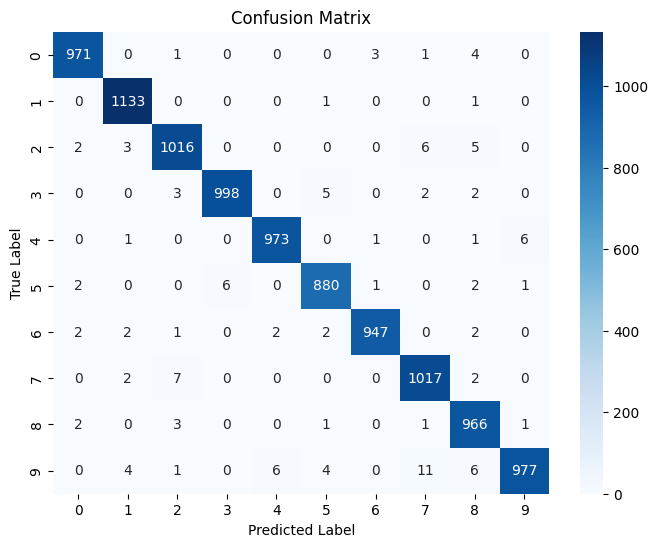

In [84]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [85]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Changing Pooling Layer**

In [86]:
model_3by3pooling_adam = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(128, activation='relu'),  # 1 output classes (for MNIST digits 0-9)
    Dense(10, activation='softmax')  # 10 output classes (for MNIST digits 0-9)
])


model_3by3pooling_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_with_3by3pooling_adam = model_3by3pooling_adam.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.8855 - loss: 0.4183 - val_accuracy: 0.9743 - val_loss: 0.0845
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9784 - loss: 0.0725 - val_accuracy: 0.9832 - val_loss: 0.0632
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 45ms/step - accuracy: 0.9842 - loss: 0.0505 - val_accuracy: 0.9822 - val_loss: 0.0551
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9889 - loss: 0.0381 - val_accuracy: 0.9840 - val_loss: 0.0547
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9918 - loss: 0.0284 - val_accuracy: 0.9825 - val_loss: 0.0549


In [109]:
model_3by3pooling_adam.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 791,648 (3.02 MB)

 Trainable params: 263,882 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 527,766 (2.01 MB)

#### Model Summary
- Conv2D Layer: Uses 32 filters of size (3,3) with ReLU activation to extract spatial features.
- MaxPooling2D Layer: (3,3) pooling reduces feature map size more aggressively than (2,2), reducing spatial dimensions.
- Flatten Layer: Converts 2D feature maps into a 1D vector for dense layers.
- Dense Layer: 128 neurons with ReLU activation for learning complex patterns.
- Output Layer: 10 neurons with softmax activation for classifying digits (0-9).
- Model Compilation: Uses Adam optimizer and categorical cross-entropy loss for multi-class classification.
- Model Training: Runs for 5 epochs with a batch size of 64, validating on a separate dataset.

In [87]:
predictions_with_3by3pooling_adam = model_3by3pooling_adam.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [95]:
predicted_labels = np.argmax(predictions_with_3by3pooling_adam, axis=1)

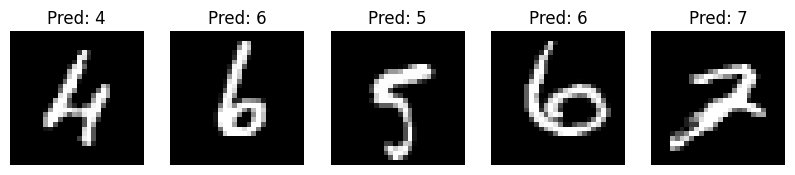

In [96]:
# Select 5 random indices
indices = np.random.choice(len(X_test), 5, replace=False)

# Plot images with their predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Show image
    plt.title(f"Pred: {predicted_labels[idx]}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.show()

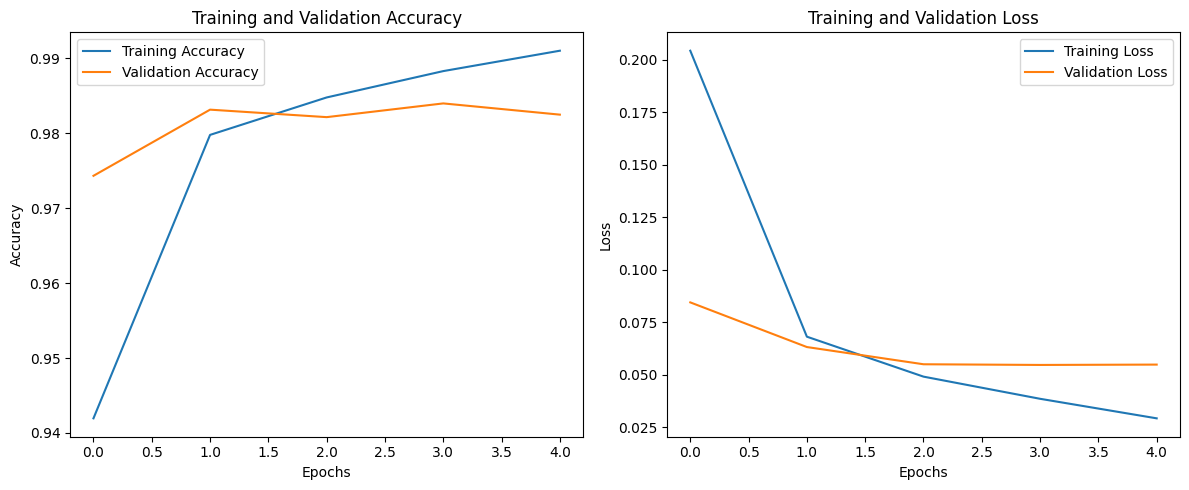

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Training and Validation Accuracy
axes[0].plot(history_with_3by3pooling_adam.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_3by3pooling_adam.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_with_3by3pooling_adam.history['loss'], label='Training Loss')
axes[1].plot(history_with_3by3pooling_adam.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [98]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

metrics_table = [[
    f"{accuracy:.4f}",
    f"{precision:.4f}",
    f"{recall:.4f}",
    f"{f1:.4f}"
]]

# Print table
print(tabulate(metrics_table, headers=["Accuracy", "Precision", "Recall", "F1-score"], tablefmt="grid"))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-score |
+============+=============+==========+============+
|     0.9863 |      0.9864 |   0.9863 |     0.9863 |
+------------+-------------+----------+------------+


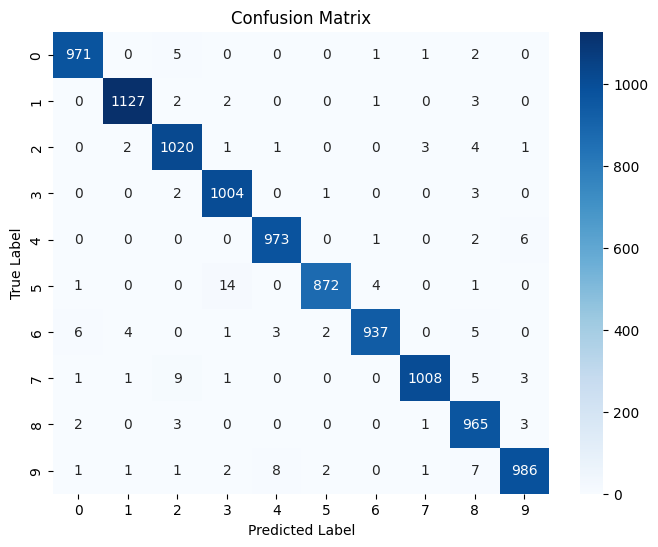

In [99]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [100]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#**Analysis**
- Model is performing very well with all combinations of filters and layers.
- As we increase number of layers model, accuracy decreases and gap betwen training and validation loss increased. This showed as we increase layer model was going into overfitting. This can be avoided with early stoping.
- When we increased changed number of filters in one CNN layer similar pattern observed where model went into overfitting.
- Since MNIST dataset is simple, the simple model was most efficient but as dataset becomes complex we have to try various diffrent model improvement methods.
